### Canal Reliance
This file includes the code to make the visualizations and get the values for the canal reliance scores.

In [12]:
# Imports (Run before running anything else)
import matplotlib.pyplot as plt
import shipping_network as sn
import geopandas as gpd
import numpy as np
import shapely

#### Params
I want to be able to use this file for both the Suez Canal and Panama Canal. Therefore, you set the canal here.

In [17]:
canal_name = 'suez'
canal_file = 'data/Global port supply-chains/Maritime_transport/edges_suez_maritime.csv'

# canal_name = 'panama'
# canal_file = 'data/Global port supply-chains/Maritime_transport/edges_panama_maritime.csv'

save = True
present = False

PAGE_WIDTH = 7.5

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

#### Network Canal Reliance
For each route in the network, calculate its reliance on the canal as the ratio between flows on the route that go through the canal and total flows

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_network_through_canal.rename(
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:66: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).plot(alpha=0.5, color="gray", ax=ax)


,from_id,to_id,from_infra,to_infra,distance,length,geometry,q_sea_flow,v_sea_flow,v_sea_flow_suez,q_sea_flow_suez,v_ratio_suez,q_ratio_suez
8932,maritime7356,port996,maritime,port,0.760835,0.007626,"LINESTRING (-70.78807 43.09303, -70.78314 43.0...",1.800854e+06,2.709503e+09,0.000000e+00,0.000000,0.000000,0.000000
8933,maritime2017,port997,maritime,port,175.511943,1.800274,"LINESTRING (-51.21938 -29.96646, -49.50000 -30...",1.786140e+06,7.723118e+08,0.000000e+00,0.000000,0.000000,0.000000
8934,maritime602,port998,maritime,port,22.471285,0.203335,"LINESTRING (-23.49969 14.91005, -23.41182 14.7...",6.280845e+05,3.495248e+08,0.000000e+00,0.000000,0.000000,0.000000
8935,maritime152,port999,maritime,port,27.415291,0.316834,"LINESTRING (-8.69758 41.19448, -8.99999 41.09999)",1.562720e+07,8.053723e+09,1.498469e+07,15746.151093,0.001861,0.001008
8936,maritime455,maritime7270,maritime,maritime,43.800000,0.000000,"LINESTRING (-79.90007 9.36664, -80.00000 9.75000)",1.777513e+08,1.189745e+11,2.090046e+08,365460.300319,0.001757,0.002056


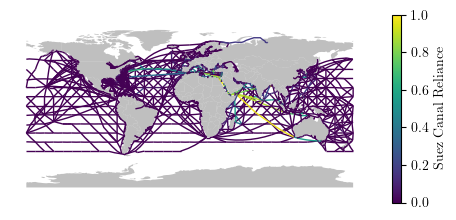

In [24]:
# get file
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')
shipping_through_canal = sn.geodataframe_from_csv(canal_file)

# canal scores
shipping_network = sn.canal_reliance(shipping_network, shipping_through_canal, canal_name)

# combine two-way edges
nonoverlapping_shipping_network = gpd.GeoDataFrame(
        sn.combine_overlapping_edges(shipping_network,
                                     ['from_id', 'to_id'],
                                     ['q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name],
                                     ['distance', 'geometry'])
    )
nonoverlapping_shipping_network['v_ratio_' + canal_name] = nonoverlapping_shipping_network['v_sea_flow_' + canal_name] / nonoverlapping_shipping_network['v_sea_flow']
nonoverlapping_shipping_network['q_ratio_' + canal_name] = nonoverlapping_shipping_network['q_sea_flow_' + canal_name] / nonoverlapping_shipping_network['q_sea_flow']

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(2)
fig.set_figwidth(4.5)
ax.axis('off')
if save: fig.patch.set_visible(False)
sn.add_earth(ax)

# plot
nonoverlapping_shipping_network[shapely.length(nonoverlapping_shipping_network['geometry']) < 359].plot( # condition removes lines that go around accross the pacific
    linewidth=1,
    cmap='viridis',
    column='v_ratio_' + canal_name,
    legend=True,
    legend_kwds={
        'label': canal_name.title() + ' Canal Reliance',
        # 'shrink': 0.5
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/shipping_network_{canal_name}_reliance.pdf')
shipping_network.tail()

#### Port Canal Reliance
For each port in the network, calculate its reliance on the canal as the ratio between flows into the port that go through the canal and total flows that go into the port

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_network_through_canal.rename(
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:66: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).plot(alpha=0.5, color="gray", ax=ax)


,id,name,iso3,geometry,lat,lon,to_id,q_sea_flow,v_sea_flow,q_sea_flow_suez,v_sea_flow_suez,q_ratio_suez,v_ratio_suez
1353,port932,Port Aransas_U.S.A.,USA,POINT (-97.07150 27.84668),27.846683,-97.071497,port932,476.347104,9.689793e+03,0.0,0.0,0.0,0.0
1354,port81,Avatiu_Cook Islands,COK,POINT (-159.78427 -21.20386),-21.203865,-159.784274,port81,98723.833977,1.066918e+08,0.0,0.0,0.0,0.0
1355,port1174,Searsport_U.S.A.,USA,POINT (-68.90260 44.45613),44.456131,-68.902602,port1174,855166.939343,1.104545e+09,0.0,0.0,0.0,0.0
1356,port372,Galeota Point Terminal_Trinidad and Tobago,TTO,POINT (-61.00210 10.13808),10.138084,-61.002097,port372,7419.063336,8.341173e+05,0.0,0.0,0.0,0.0
1357,port721,Matthew Town_Bahamas,BHS,POINT (-73.64616 21.04686),21.046857,-73.646164,port721,0.000633,5.095891e+00,0.0,0.0,0.0,0.0


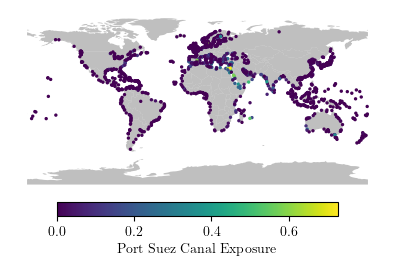

In [23]:
# get file
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')
shipping_through_canal = sn.geodataframe_from_csv(canal_file)

# canal scores
shipping_network = sn.canal_reliance(shipping_network, shipping_through_canal, canal_name)

# port inflow scores
ports = ports.merge(
        right=shipping_network[['to_id', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name, 'q_ratio_' + canal_name, 'v_ratio_' + canal_name]],
        left_on='id',
        right_on='to_id'
    )

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')
sn.add_earth(ax)

# plot
ports.plot( # condition removes lines that go around accross the pacific
    markersize=2,
    cmap='viridis',
    column='v_ratio_' + canal_name,
    legend=True,
    legend_kwds={
        'label': 'Port '+canal_name.title()+' Canal Exposure',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/port_{canal_name}_reliance.pdf', bbox_inches='tight', pad_inches=0)
ports.tail()

#### Country Canal Reliance
For each country in the network, calculate its reliance on the canal as the ratio between flows into the country that go through the canal and total flows that go into the country

/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_40471/3999803207.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_network_through_canal.rename(


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso3,q_sea_flow,v_sea_flow,q_sea_flow_suez,v_sea_flow_suez,q_ratio_suez,v_ratio_suez
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,1.042214e+06,6.609415e+08,5818.205545,6.022491e+06,0.005583,0.009112
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,5.587070e+07,1.313511e+10,632.679628,4.803041e+05,0.000011,0.000037
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN


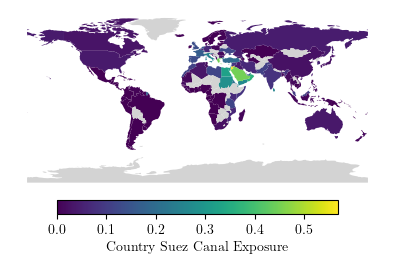

In [22]:
# get file
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')
shipping_through_canal = sn.geodataframe_from_csv(canal_file)
earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# canal scores
shipping_network = sn.canal_reliance(shipping_network, shipping_through_canal, canal_name)

# port inflow scores
ports = ports.merge(
        right=shipping_network[['to_id', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name, 'q_ratio_' + canal_name, 'v_ratio_' + canal_name]],
        left_on='id',
        right_on='to_id'
    )

# merge data for eacg country
earth = earth.merge(
        right=ports[['iso3', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name]].groupby('iso3').sum().reset_index(),
        left_on='iso_a3',
        right_on='iso3',
        how='left'
    ).replace(np.NaN, 0)
earth['q_ratio_' + canal_name] = earth['q_sea_flow_' + canal_name] / earth['q_sea_flow']
earth['v_ratio_' + canal_name] = earth['v_sea_flow_' + canal_name] / earth['v_sea_flow']

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')

# plot
earth.plot( # condition removes lines that go around accross the pacific
    column='v_ratio_' + canal_name,
    cmap='viridis',
    missing_kwds={'color': 'lightgrey'},
    legend=True,
    legend_kwds={
        'label': 'Country '+canal_name.title()+' Canal Exposure',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/country_{canal_name}_reliance.pdf', bbox_inches='tight', pad_inches=0)
earth.tail()